In [36]:
# Imports

from plyer import notification
from datetime import datetime
import pandas as pd
import requests

ALERTA

In [2]:
#alert

def alerta(nivel, base, etapa):

  if nivel == 1:
    titulo= "Alerta Baixo"
  elif nivel == 2:
    titulo = "Alerta Médio"
  else:
    titulo = "Alerta Alto"

  data_atual = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

  messagem = f"Falha no carregamento da base {base} na fase de {etapa}. Data: {data_atual}"


  notification.notify(
  title=titulo,
  message= messagem,
  app_name= "Rick and Morty API",
  timeout=10
  
)

# alerta(3, "Base de Dados", "Teste")

EXTRAÇÃO

In [78]:

def get_data_api(url, base, etapa):
    try:
        response = requests.get(url)

        if response.status_code == 200:
            return response.json()  
        else:
            alerta(nivel=3, base=base, etapa=etapa)  

    except requests.RequestException as e:
        alerta(nivel=3, base=base, etapa=etapa)
        print(f"Erro ao acessar a API: {e}")
        return None

In [79]:

character_url_next = 'https://rickandmortyapi.com/api/character'

base = character_url_next

etapa = "Extração"

get_data_api(character_url_next,base,etapa)


{'info': {'count': 826,
  'pages': 42,
  'next': 'https://rickandmortyapi.com/api/character?page=2',
  'prev': None},
 'results': [{'id': 1,
   'name': 'Rick Sanchez',
   'status': 'Alive',
   'species': 'Human',
   'type': '',
   'gender': 'Male',
   'origin': {'name': 'Earth (C-137)',
    'url': 'https://rickandmortyapi.com/api/location/1'},
   'location': {'name': 'Citadel of Ricks',
    'url': 'https://rickandmortyapi.com/api/location/3'},
   'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg',
   'episode': ['https://rickandmortyapi.com/api/episode/1',
    'https://rickandmortyapi.com/api/episode/2',
    'https://rickandmortyapi.com/api/episode/3',
    'https://rickandmortyapi.com/api/episode/4',
    'https://rickandmortyapi.com/api/episode/5',
    'https://rickandmortyapi.com/api/episode/6',
    'https://rickandmortyapi.com/api/episode/7',
    'https://rickandmortyapi.com/api/episode/8',
    'https://rickandmortyapi.com/api/episode/9',
    'https://rickandmortyapi.

In [93]:
def get_all_characters():
    base = 'Characters'
    etapa = ' Extração'
    character_url_next = 'https://rickandmortyapi.com/api/character'

    all_characters = []  
    
    while character_url_next:  
        character_data = get_data_api(character_url_next, base, etapa) 
        character_url_next = character_data['info']['next'] 
        all_characters.extend(character_data['results'])  
        
    
    return all_characters

characters = get_all_characters()

print(len(characters))

826


In [94]:
df_characters = pd.DataFrame(characters)

df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        826 non-null    int64 
 1   name      826 non-null    object
 2   status    826 non-null    object
 3   species   826 non-null    object
 4   type      826 non-null    object
 5   gender    826 non-null    object
 6   origin    826 non-null    object
 7   location  826 non-null    object
 8   image     826 non-null    object
 9   episode   826 non-null    object
 10  url       826 non-null    object
 11  created   826 non-null    object
dtypes: int64(1), object(11)
memory usage: 77.6+ KB


In [95]:
df_characters.head()

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z


In [54]:

location_url_next = 'https://rickandmortyapi.com/api/location'

base = character_url_next

etapa = "Extração"

get_data_api(location_url_next, base, etapa)

{'info': {'count': 126,
  'pages': 7,
  'next': 'https://rickandmortyapi.com/api/location?page=2',
  'prev': None},
 'results': [{'id': 1,
   'name': 'Earth (C-137)',
   'type': 'Planet',
   'dimension': 'Dimension C-137',
   'residents': ['https://rickandmortyapi.com/api/character/38',
    'https://rickandmortyapi.com/api/character/45',
    'https://rickandmortyapi.com/api/character/71',
    'https://rickandmortyapi.com/api/character/82',
    'https://rickandmortyapi.com/api/character/83',
    'https://rickandmortyapi.com/api/character/92',
    'https://rickandmortyapi.com/api/character/112',
    'https://rickandmortyapi.com/api/character/114',
    'https://rickandmortyapi.com/api/character/116',
    'https://rickandmortyapi.com/api/character/117',
    'https://rickandmortyapi.com/api/character/120',
    'https://rickandmortyapi.com/api/character/127',
    'https://rickandmortyapi.com/api/character/155',
    'https://rickandmortyapi.com/api/character/169',
    'https://rickandmortyapi

In [64]:
def get_all_locations():

    base = 'Locations'
    etapa = ' Extração'
    
    location_url_next = 'https://rickandmortyapi.com/api/location'

    all_locations = []  
    
    while location_url_next:  
        location_data = get_data_api(location_url_next, base, etapa) 
        location_url_next = location_data['info']['next'] 
        all_locations.extend(location_data['results'])  
        
    
    return  all_locations

locations = get_all_locations()

print(len(locations))

126


In [65]:
df_locations = pd.DataFrame(locations)

df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         126 non-null    int64 
 1   name       126 non-null    object
 2   type       126 non-null    object
 3   dimension  126 non-null    object
 4   residents  126 non-null    object
 5   url        126 non-null    object
 6   created    126 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.0+ KB


In [63]:
df_characters.head(3)

,id,name,status,species,type,gender,image,url,name_origin,url_origin,location_name,url_location,total_episodes
0,1,Rick Sanchez,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/1,Earth (C-137),https://rickandmortyapi.com/api/location/1,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
1,2,Morty Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/2,unknown,,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
2,3,Summer Smith,Alive,Human,unknown,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/3,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,42


In [28]:
episode_url_next = 'https://rickandmortyapi.com/api/episode'
base = episode_url_next
etapa = 'Extração'

get_data_api(episode_url_next, base, etapa)

{'info': {'count': 51,
  'pages': 3,
  'next': 'https://rickandmortyapi.com/api/episode?page=2',
  'prev': None},
 'results': [{'id': 1,
   'name': 'Pilot',
   'air_date': 'December 2, 2013',
   'episode': 'S01E01',
   'characters': ['https://rickandmortyapi.com/api/character/1',
    'https://rickandmortyapi.com/api/character/2',
    'https://rickandmortyapi.com/api/character/35',
    'https://rickandmortyapi.com/api/character/38',
    'https://rickandmortyapi.com/api/character/62',
    'https://rickandmortyapi.com/api/character/92',
    'https://rickandmortyapi.com/api/character/127',
    'https://rickandmortyapi.com/api/character/144',
    'https://rickandmortyapi.com/api/character/158',
    'https://rickandmortyapi.com/api/character/175',
    'https://rickandmortyapi.com/api/character/179',
    'https://rickandmortyapi.com/api/character/181',
    'https://rickandmortyapi.com/api/character/239',
    'https://rickandmortyapi.com/api/character/249',
    'https://rickandmortyapi.com/api

In [31]:
def get_all_episodes():

 episode_url_next = 'https://rickandmortyapi.com/api/episode'

 base = "Episodes"
 etapa = "Extração"

 all_episodes = []

 while episode_url_next:
  episode_data = get_data_api(episode_url_next, base, etapa)
  episode_url_next = episode_data['info']['next']
  all_episodes.extend(episode_data['results'])

 return all_episodes

episodes = get_all_episodes()

print(len(episodes))
  


51


In [32]:
df_episodes = pd.DataFrame(episodes)

df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          51 non-null     int64 
 1   name        51 non-null     object
 2   air_date    51 non-null     object
 3   episode     51 non-null     object
 4   characters  51 non-null     object
 5   url         51 non-null     object
 6   created     51 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


In [33]:
df_episodes.head()

,id,name,air_date,episode,characters,url,created
0,1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,2017-11-10T12:56:33.798Z
1,2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2017-11-10T12:56:33.916Z
2,3,Anatomy Park,"December 16, 2013",S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3,2017-11-10T12:56:34.022Z
3,4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4,2017-11-10T12:56:34.129Z
4,5,Meeseeks and Destroy,"January 20, 2014",S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5,2017-11-10T12:56:34.236Z


TRANSFORMAÇÃO


Etapa de transformação do Schema de Character

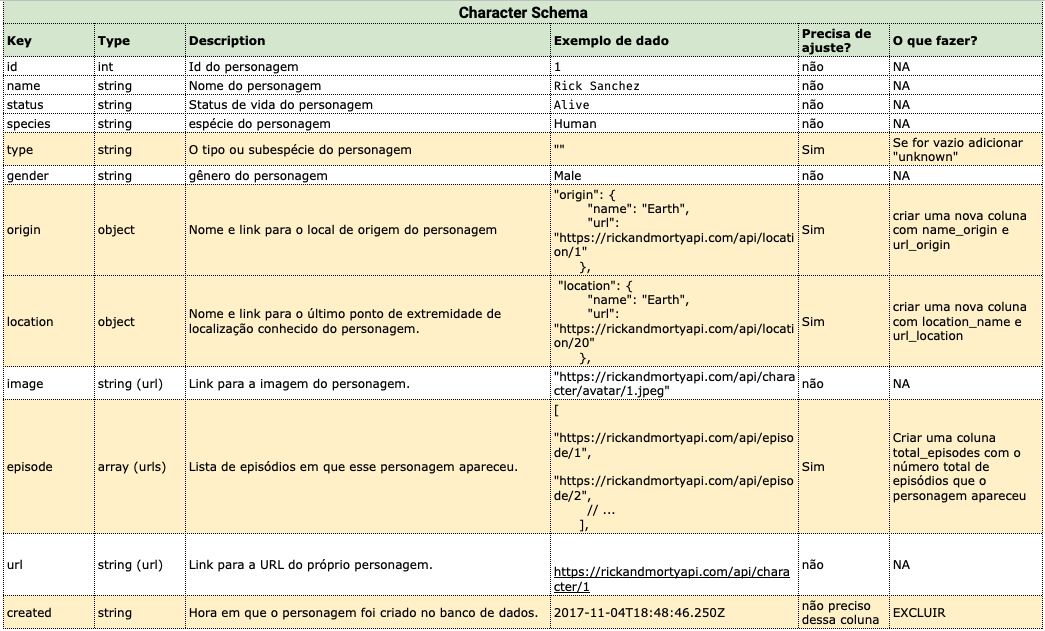

In [90]:
#CHARACTER

#se o type estiver vazio adiciona a string unknown
df_characters["type"] = df_characters["type"].replace("", "unknown")

#Separando os dados da coluna origin em 2 colunas
df_characters["name_origin"] = df_characters["origin"].apply(lambda name_origin: name_origin.get("name"))
df_characters["url_origin"] = df_characters["origin"].apply(lambda url_origin: url_origin.get("url") )

#Separando os dados da coluna location em 2 colunas
df_characters["location_name"] = df_characters["location"].apply(lambda location_name: location_name.get("name"))
df_characters["url_location"] = df_characters["location"].apply(lambda url_location: url_location.get("url"))

#Criando uma nova coluna com o total de episódios do personagem a partir do tamanho do array da coluna episode
df_characters["total_episodes"] = df_characters["episode"].apply(len)

#excluindo as colunas que não serão utilizadas
df_characters = df_characters.drop(columns=["origin", "location", "created", "episode"])


df_characters.head()

,id,name,status,species,type,gender,image,url,name_origin,url_origin,location_name,url_location,total_episodes
0,1,Rick Sanchez,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/1,Earth (C-137),https://rickandmortyapi.com/api/location/1,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
1,2,Morty Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/2,unknown,,Citadel of Ricks,https://rickandmortyapi.com/api/location/3,51
2,3,Summer Smith,Alive,Human,unknown,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/3,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,42
3,4,Beth Smith,Alive,Human,unknown,Female,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/4,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,42
4,5,Jerry Smith,Alive,Human,unknown,Male,https://rickandmortyapi.com/api/character/avat...,https://rickandmortyapi.com/api/character/5,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,Earth (Replacement Dimension),https://rickandmortyapi.com/api/location/20,39
